In [10]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import missingno as msno

import warnings

%matplotlib inline

# warnings.filterwarnings('ignore')
# plt.style.use("ggplot")
plt.style.use('seaborn-darkgrid')



In [2]:
file = 'netflix_titles.csv'
df = pd.read_csv(file)
print(df.shape)
print(df.columns)
df.info()

(6234, 12)
Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
show_id         6234 non-null int64
type            6234 non-null object
title           6234 non-null object
director        4265 non-null object
cast            5664 non-null object
country         5758 non-null object
date_added      6223 non-null object
release_year    6234 non-null int64
rating          6224 non-null object
duration        6234 non-null object
listed_in       6234 non-null object
description     6234 non-null object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


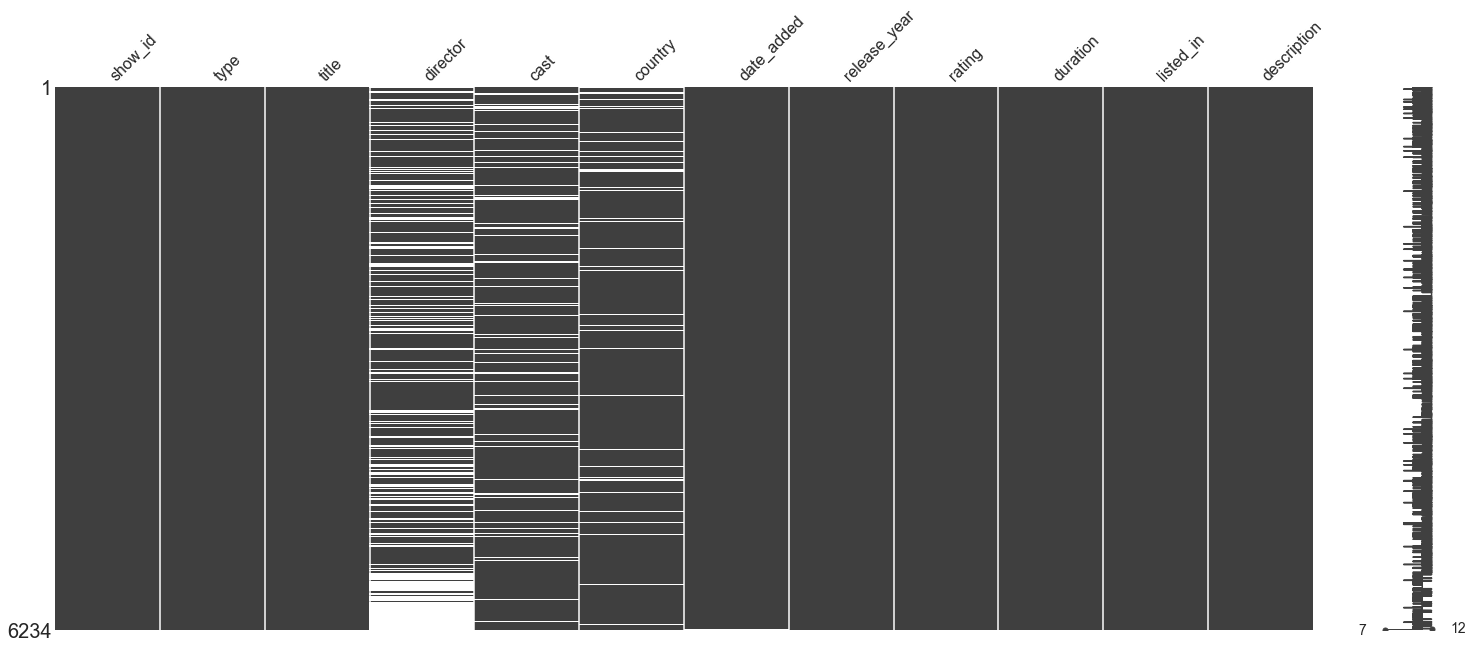

In [11]:
msno.matrix(df)

Looks like director, cast and country column has lots of missing values. Let's take a look at them statistics wise.

In [4]:
for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100 
    if null_rate > 0 :
        print(f"{i}'s null rate : {null_rate} %")

director's null rate : 31.584857234520374 %
cast's null rate : 9.143407122232915 %
country's null rate : 7.635547000320821 %
date_added's null rate : 0.17645171639396856 %
rating's null rate : 0.16041065126724416 %


### There's a total of 6234 videos available and its features are director, cast & country.

### As we can see from above `Director`, `Cast` & `Country` has lots of missing data.

In [5]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [6]:
df.describe(include='all').head(4)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,6234.0,6234,6234,4265,5664,5758,6223,6234.0,6224,6234,6234,6234
unique,NaN,2,6172,3301,5469,554,1524,NaN,14,201,461,6226
top,NaN,Movie,Love,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,A surly septuagenarian gets another chance at ...
freq,NaN,4265,3,18,18,2032,122,NaN,2027,1321,299,3


In [7]:
# Some cleaning
df_c = df.fillna('NULL')
df_c['year_added'] = df_c['date_added'].apply(lambda x: x.split(',')[-1])
# We didn't want to include 2020 since the year just started not too long so it wont give a 
# a good insight of the year.
df_c['year_added'] = df_c['year_added'].apply(lambda x : x if x != 'NULL' else '2020')
df_c['year_added'] = df_c['year_added'].apply(int)

# Distribution of Content

We would like to really find out more about the contents being published, let's check out the distribution of the content for Netflix.

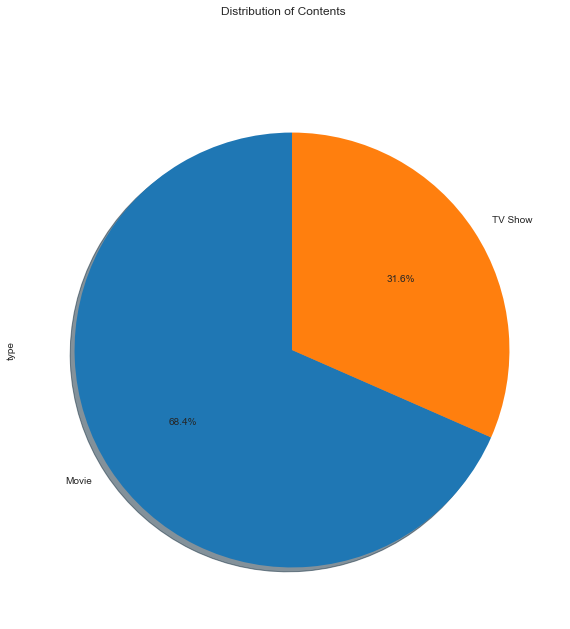

In [55]:
ax_p = df_c['type'].value_counts().plot(kind='pie',subplots=True, figsize=(10,10), startangle = 90, shadow = True, 
         autopct = '%1.1f%%', legend=False, title='Distribution of Contents')
# ax_p.set()

### 31.6% or about 2/3 of the contents are made up of TV Shows.

In [8]:
year_data = df_c['year_added'].value_counts().sort_index().loc[:2019]
type_data = df_c.groupby('year_added')['type'].value_counts().unstack().fillna(0).loc[:2019]

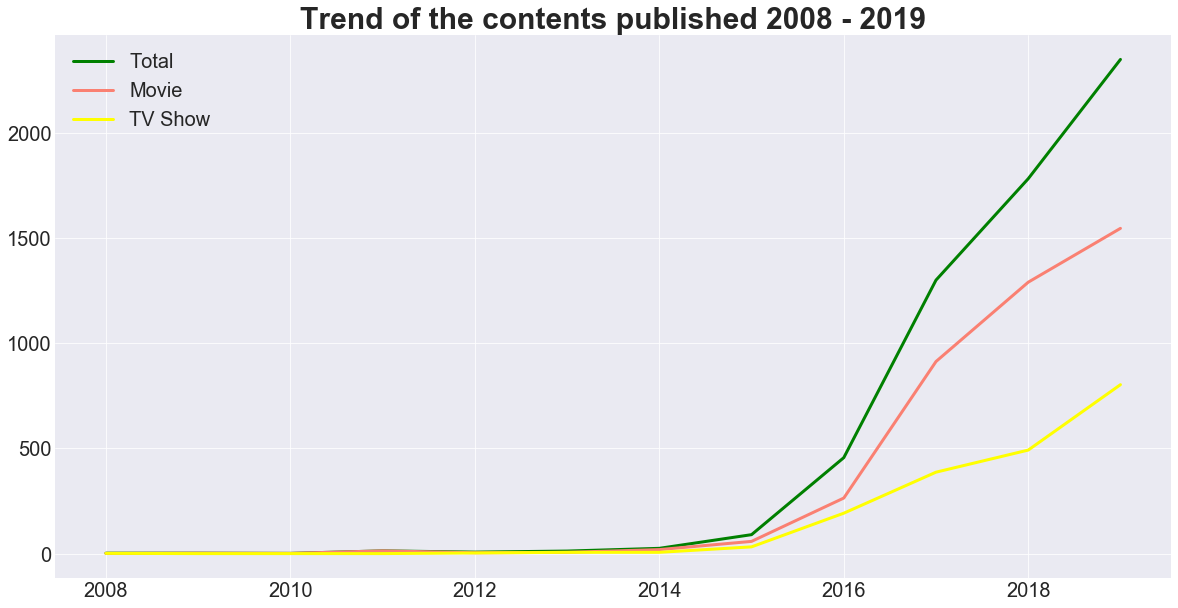

In [12]:
# Trend of the contents published by 
fig, ax = plt.subplots(1,1, figsize=(20,10))

ax.plot(year_data.index, year_data, color = 'green', linewidth=3, label='Total')
ax.plot(type_data.index, type_data['Movie'], color='salmon', linewidth=3, label='Movie')
ax.plot(type_data.index, type_data['TV Show'], color='yellow', linewidth=3, label='TV Show')

ax.yaxis.set_tick_params(labelsize=20)
ax.xaxis.set_tick_params(labelsize=20)
ax.set_title('Trend of the contents published 2008 - 2019', fontsize=30, fontweight='bold')
plt.legend(loc='upper left', fontsize=20)


#### There is a significant increase in the contents published during recent years, what could possibly drive this sudden increase? 
#### It could be that launching of streaming services in other countries definitely contributed to the exponential growth of the content.
#### Let's look at the `year_added` column that we create earlier and compare with [Netflix's Timeline here.](https://en.wikipedia.org/wiki/Timeline_of_Netflix)

# Which country produces the most Contents?


Now, let's take a look at the country column and make a count. But first, some preprocessing needs to be done.

In [13]:
df_c['country'].head(20)

0              United States, India, South Korea, China
1                                        United Kingdom
2                                         United States
3                                         United States
4                                         United States
5                                                 Spain
6                Bulgaria, United States, Spain, Canada
7                                                 Chile
8                                         United States
9        United States, United Kingdom, Denmark, Sweden
10                                                 NULL
11    Netherlands, Belgium, United Kingdom, United S...
12                                                 NULL
13                                                 NULL
14                                                 NULL
15                                                 NULL
16                                                 NULL
17                                              